# Assignment 7 - Develop a text preprocessing and analysis application using NLTK for tokenization, POS tagging, and basic NLP tasks. 

In [1]:
!pip install nltk streamlit matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]    

True

In [3]:
import string
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer


In [4]:
text = """
India is rapidly growing in the field of Artificial Intelligence.
Many companies like Google and Microsoft are investing heavily in AI research.
"""

In [5]:
sentences = sent_tokenize(text)
words = word_tokenize(text.lower())

words = [w for w in words if w not in string.punctuation]

print("Sentences:\n", sentences)
print("\nWords:\n", words)

Sentences:
 ['\nIndia is rapidly growing in the field of Artificial Intelligence.', 'Many companies like Google and Microsoft are investing heavily in AI research.']

Words:
 ['india', 'is', 'rapidly', 'growing', 'in', 'the', 'field', 'of', 'artificial', 'intelligence', 'many', 'companies', 'like', 'google', 'and', 'microsoft', 'are', 'investing', 'heavily', 'in', 'ai', 'research']


In [6]:
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]

print("Filtered Words:\n", filtered_words)

Filtered Words:
 ['india', 'rapidly', 'growing', 'field', 'artificial', 'intelligence', 'many', 'companies', 'like', 'google', 'microsoft', 'investing', 'heavily', 'ai', 'research']


In [7]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stems = [stemmer.stem(w) for w in filtered_words]
lemmas = [lemmatizer.lemmatize(w) for w in filtered_words]

print("Stems:\n", stems)
print("\nLemmas:\n", lemmas)

Stems:
 ['india', 'rapidli', 'grow', 'field', 'artifici', 'intellig', 'mani', 'compani', 'like', 'googl', 'microsoft', 'invest', 'heavili', 'ai', 'research']

Lemmas:
 ['india', 'rapidly', 'growing', 'field', 'artificial', 'intelligence', 'many', 'company', 'like', 'google', 'microsoft', 'investing', 'heavily', 'ai', 'research']


In [8]:
pos_tags = pos_tag(filtered_words)
print("POS Tags:\n", pos_tags)

POS Tags:
 [('india', 'RB'), ('rapidly', 'RB'), ('growing', 'VBG'), ('field', 'NN'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('many', 'JJ'), ('companies', 'NNS'), ('like', 'IN'), ('google', 'NN'), ('microsoft', 'NN'), ('investing', 'VBG'), ('heavily', 'RB'), ('ai', 'VBP'), ('research', 'NN')]


In [10]:
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')   # VERY IMPORTANT
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SRINIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [11]:
ner_tree = ne_chunk(pos_tags)
print("Named Entities:\n")
print(ner_tree)


Named Entities:

(S
  india/RB
  rapidly/RB
  growing/VBG
  field/NN
  artificial/JJ
  intelligence/NN
  many/JJ
  companies/NNS
  like/IN
  google/NN
  microsoft/NN
  investing/VBG
  heavily/RB
  ai/VBP
  research/NN)


In [12]:
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)

print("Sentiment Scores:\n", sentiment)

Sentiment Scores:
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.743}


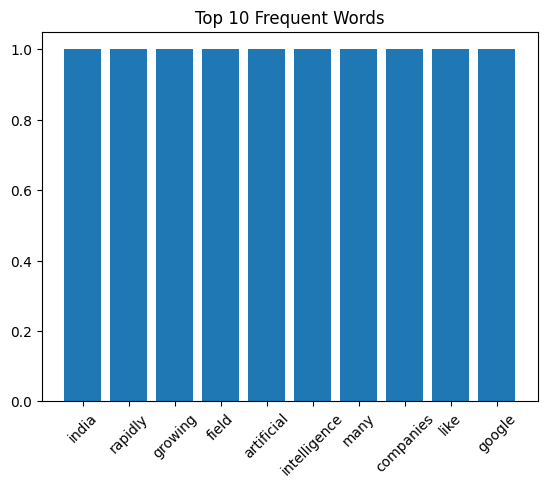

In [13]:
freq = Counter(filtered_words)

common_words = freq.most_common(10)

words_plot = [x[0] for x in common_words]
counts_plot = [x[1] for x in common_words]

plt.figure()
plt.bar(words_plot, counts_plot)
plt.xticks(rotation=45)
plt.title("Top 10 Frequent Words")
plt.show()
